#          <center>   Fraudy </center>

![title](img/f2.png)

 
### Fraudy są: 
 
   #### - rzadkie
   #### - ukryte
   #### - zorganizowane 
   #### - zmieniające się w czasie
 

![title](img/f1.png)

https://www.kaggle.com/mlg-ulb/creditcardfraud/ 

https://drive.google.com/open?id=109iyQMd7Y9iJ6py9Vy0Zf01ROMzzDCtd

https://github.com/liber1320/warsztaty_dw/

![title](img/t.png)

In [1]:
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.base import clone
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
from sklearn.preprocessing import RobustScaler, StandardScaler

import zipfile
import os

import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'C:\\Users\\ja\\OneDrive\\python\\road_to_ai'

### Wczytanie danych

In [2]:
FRAUD_PATH = os.path.join("FRAUD", "DATA")
FILE_PATH = os.path.join(os.getcwd(), "creditcardfraud.zip")

def extract_data(fraud_path=FRAUD_PATH, file_path=FILE_PATH):
    if not os.path.isdir(fraud_path):
        os.makedirs(fraud_path)
    zip_ref = zipfile.ZipFile(file_path,'r')
    zip_ref.extractall(fraud_path)

In [17]:
extract_data()

In [2]:
FRAUD_PATH = os.path.join("FRAUD", "DATA")
path=os.path.join(FRAUD_PATH, 'creditcard.csv')

df=pd.read_csv(path)

#### Próbka danych

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152297,97235.0,-0.570560,1.030705,-0.262184,-0.894621,1.701081,-1.065216,1.644518,-0.561838,0.496247,-1.109056,0.169304,-2.349535,2.209732,1.959550,-0.687117,-0.761355,0.363855,-0.203679,-0.106232,-0.169606,0.065285,0.536861,-0.195483,0.618299,0.529330,0.170072,-0.073707,0.076690,11.00,0
57328,47863.0,-0.926834,0.959812,1.613691,0.939942,0.325792,-0.588327,0.926921,-0.116860,-1.235088,-0.029804,1.445954,0.606177,-0.038316,0.565458,0.270085,-0.281670,-0.263766,0.356338,0.778617,0.019811,0.100495,0.232795,-0.349369,0.560322,0.486607,-0.249783,-0.036232,0.055677,52.00,0
77768,57202.0,0.743239,-2.015629,-0.184526,-1.104168,-0.890931,0.935650,-0.544564,0.130709,-2.041836,1.028126,0.708449,0.255150,1.249162,-0.349659,0.606128,-2.349979,2.150293,-2.435239,-1.723934,0.174423,0.124402,0.396591,-0.193040,-0.571432,0.244109,0.008834,0.038110,0.052177,313.40,0
212926,139042.0,-2.350225,2.461741,-0.327715,2.388222,-0.023057,0.156129,-0.448427,1.731689,-2.027364,-0.118725,-2.406129,-0.429137,-0.521015,1.282669,-1.442891,1.641929,-0.487512,0.021180,-2.110110,-0.757451,0.291302,0.003028,-0.047649,0.515181,0.037872,-0.220328,-0.815833,-0.146364,0.01,0
55332,46889.0,-0.605262,0.865170,-0.759127,-0.209291,2.116151,3.567202,0.147370,1.231199,-0.992012,-0.452010,-0.451497,-0.173420,0.032904,0.812958,1.165483,0.138781,-0.524327,0.626359,0.780315,0.175306,0.191706,0.188945,0.033208,0.997750,-0.043427,-0.319437,0.024007,0.100721,85.25,0


#### Rozkład zmiennej docelowej

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df['Class'].value_counts(normalize=True)[1]*100

0.1727485630620034

###  Modele

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [4]:
X = df.loc[:, df.columns!='Class'].values 
y = df['Class'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [6]:
def train_and_predict(model, X, y, test_size=0.3, matrix=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,random_state=2019)    
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc= np.round(accuracy_score(y_test, y_pred),3)
    prec= np.round(precision_score(y_test, y_pred),3)
    recc= np.round(recall_score(y_test, y_pred),3)
    f1= np.round(f1_score(y_test, y_pred),3)
    
    if matrix==True:
        print('confusion matrix','\n',confusion_matrix(y_test,y_pred))    
    return np.round((acc, recc, prec, f1),3)

In [21]:
models=[DummyClassifier(random_state=2019),
        LogisticRegression(random_state=2019),
        DecisionTreeClassifier(random_state=2019),
        RandomForestClassifier(random_state=2019),
        xgb.XGBClassifier(random_state=2019),
        GradientBoostingClassifier(random_state=2019)]

print('     Model      (accuracy, recall, precision, f1)  ')
for m in models:
    print(type(m).__name__, train_and_predict(m, X, y, test_size=0.3))

     Model      (accuracy, recall, precision, f1)  
DummyClassifier (0.997, 0.0, 0.0, 0.0)
LogisticRegression (0.999, 0.699, 0.748, 0.723)
DecisionTreeClassifier (0.999, 0.797, 0.753, 0.775)
RandomForestClassifier (1.0, 0.804, 0.918, 0.857)
XGBClassifier (0.999, 0.784, 0.889, 0.833)
GradientBoostingClassifier (0.999, 0.712, 0.865, 0.781)


#### Feature engineering

In [4]:
def feature_eng(df):   
    df['Amount_scaled'] = RobustScaler().fit_transform(df[['Amount']])
    df['Amount_1']= df['Amount'].apply(lambda x: 1 if x==1 else 0)
    df['Amount_100']= df['Amount'].apply(lambda x: 1 if x==100 else 0)
    df['Day']=df['Time'].apply(lambda x: 1 if x<=86400 else 2)
    df['Day_time']=df['Time'].apply(lambda x: x if x<=86400 else x-86400)
    return df

In [5]:
df=feature_eng(df)
print(df.shape)

(284807, 36)


In [5]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Amount_1,Amount_100,Day,Day_time
227330,145032.0,2.065855,0.096493,-1.884878,0.187637,0.712314,-0.278030,0.074736,-0.060307,0.262613,-0.209653,0.702755,0.692501,0.096957,-0.683291,-0.463314,0.652735,0.044646,0.341933,0.524840,-0.126650,-0.344294,-0.918936,0.266853,-0.002485,-0.222503,0.184126,-0.066980,-0.045439,1.98,0,-0.279746,0,0,2,58632.0
6058,6864.0,-0.715086,0.820304,2.894118,0.866743,-0.468314,0.022323,0.036171,0.151536,1.531076,-1.122087,-0.124112,-2.819011,0.805014,1.133519,-0.618197,-0.049928,0.592028,0.494335,-0.154049,-0.115690,-0.166237,-0.131354,-0.264552,0.305702,0.280306,-0.412001,0.078148,0.078279,9.99,0,-0.167819,0,0,1,6864.0
146349,87621.0,-0.486079,0.643577,0.431553,-0.796935,1.071179,-0.788250,0.917475,-0.091066,-0.146180,-0.793587,-1.359071,-1.047534,-1.525397,0.688739,0.633574,-0.124710,-0.543460,0.403779,-0.131617,-0.132843,0.286305,0.712160,-0.413208,0.573718,0.428326,-0.105829,0.068605,0.122048,2.27,0,-0.275693,0,0,2,1221.0
222434,142969.0,-1.229895,0.850463,1.594567,3.059248,1.975758,0.087203,0.781401,-0.126484,-2.219570,1.392486,0.302855,-0.636077,-0.610993,0.429233,-0.551020,0.703127,-0.983837,0.574668,-0.467468,-0.088353,0.195361,0.615242,-0.727090,-0.384491,0.734687,0.370107,-0.198347,-0.207914,18.96,0,-0.042479,0,0,2,56569.0
120603,75885.0,1.246470,-0.410488,-0.344760,-0.318696,1.440593,3.953925,-1.211885,1.073593,0.798845,-0.177568,-0.505484,0.268522,0.000316,-0.267708,0.386479,0.488398,-0.674482,0.207757,0.333567,0.013542,-0.147986,-0.372082,0.000042,1.039270,0.415766,0.332573,0.020210,0.019627,3.99,0,-0.251659,0,0,1,75885.0


#### Podział danych

In [6]:
sp = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=2019)

for train_index, test_index in sp.split(df, df['Class']):
    train=df.loc[train_index]
    test=df.loc[test_index]
    
train=train.reset_index()
test=test.reset_index()

In [13]:
print('Percent of fraud in full data set: {}%'.format(round(df['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of fraud in train data set: {}%'.format(round(train['Class'].value_counts(normalize=True)[1]*100,2)))
print('Percent of fraud in test data set: {}%'.format(round(test['Class'].value_counts(normalize=True)[1]*100,2)))

Percent of fraud in full data set: 0.17%
Percent of fraud in train data set: 0.17%
Percent of fraud in test data set: 0.17%


#### Cross validation

In [9]:
def my_cv (m, x, y):    
    scores_r = []
    scores_p = []
    scores_f = []
    
    cv = StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)  
    
    for train_idx, test_idx in cv.split(x,y): 
        model=clone(m)
        model.fit(x.loc[train_idx], y[train_idx])
        y_pred = model.predict (x.loc[test_idx])  
        
        score1 = recall_score(y[test_idx], y_pred)
        score2 = precision_score(y[test_idx], y_pred)
        score3 = f1_score(y[test_idx], y_pred)
        
        scores_r.append(score1)
        scores_p.append(score2)
        scores_f.append(score3) 
        
    return np.mean(scores_r), np.mean(scores_p), np.mean(scores_f)

In [31]:
black_list=['Class','Amount','Time']
features=[x for x in df.columns if x not in black_list ]

X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

models=[RandomForestClassifier(random_state=2019),
        LogisticRegression(random_state=2019)]

for m in models:
    print(type(m).__name__, ' ', np.round(my_cv(m, X_cv, y_cv),2))

RandomForestClassifier   [ 0.76  0.95  0.84]
LogisticRegression   [ 0.57  0.85  0.68]


### Krzywe uczenia

In [36]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.title(type(estimator).__name__)
    plt.legend(loc="best")
    return plt

#### Overfitting !!!

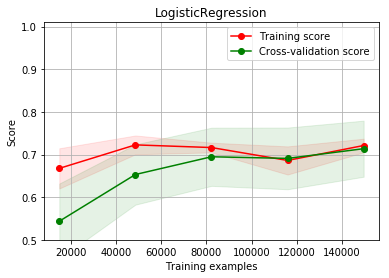

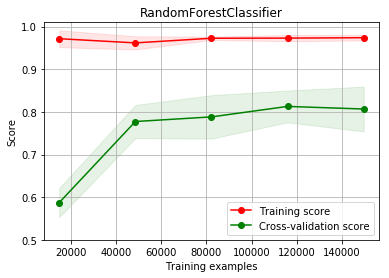

In [44]:
cv=StratifiedKFold(n_splits=4, random_state=2019, shuffle=True)

for m in [LogisticRegression(random_state=2019), RandomForestClassifier(random_state=2019)]:
    plot_learning_curve(m, X_cv, y_cv, ylim=(0.5, 1.01), cv=cv)

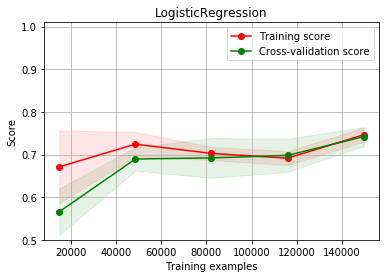

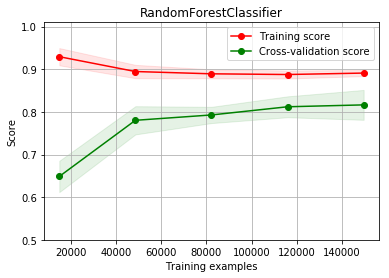

In [45]:
models=[LogisticRegression(solver='lbfgs', C=0.1, random_state=2019),
        RandomForestClassifier(max_depth=7, n_estimators=120, random_state=2019)]

cv=StratifiedKFold(n_splits=4, random_state=2019, shuffle=True)

for m in models:
    plot_learning_curve(m, X_cv, y_cv, ylim=(0.5, 1.01), cv=cv)

In [32]:
models=[RandomForestClassifier(max_depth=7, n_estimators=120, random_state=2019),
        LogisticRegression(solver='lbfgs', C=0.1, random_state=2019)]

for m in models:
    print(type(m).__name__, ' ', np.round(my_cv(m, X_cv, y_cv),2))

RandomForestClassifier   [ 0.75  0.93  0.83]
LogisticRegression   [ 0.65  0.81  0.72]


In [10]:
def validation(model, df_train=None, df_test=None, matrix=True):
    
    black_list=['Class','Amount','Time']
    features=[x for x in df.columns if x not in black_list ]   
    X = df_train.loc[:,features].values 
    y = df_train['Class'].values
 
    X_test = df_test.loc[:,features].values
    y_test = df_test['Class'].values
    
    print(type(model).__name__)
    model.fit(X, y)
    y_pred=model.predict(X_test)

    if matrix==True:
        print('confusion matrix','\n', confusion_matrix(y_test,y_pred))    
        
    rec=np.round(recall_score(y_test,y_pred),3)
    prec=np.round(precision_score(y_test,y_pred),3)
    f1=np.round(f1_score(y_test,y_pred),3)
    
    return rec, prec, f1   

In [35]:
for m in models:
    print('(rec, prec, f1)', np.round(validation(m, train, test), 3) ,'\n')

RandomForestClassifier
confusion matrix 
 [[85289     6]
 [   37   111]]
(rec, prec, f1) [ 0.75   0.949  0.838] 

LogisticRegression
confusion matrix 
 [[85269    26]
 [   42   106]]
(rec, prec, f1) [ 0.716  0.803  0.757] 



### Precision recall curves

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    
    plt.plot(recalls, precisions, "b-", linewidth=2)
    
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)    
    plt.axis([0, 1, 0, 1])

RandomForestClassifier


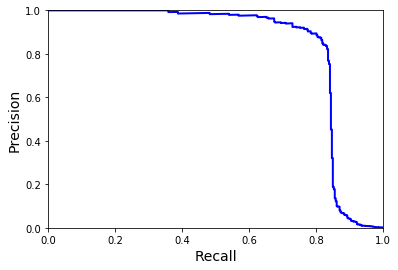

LogisticRegression


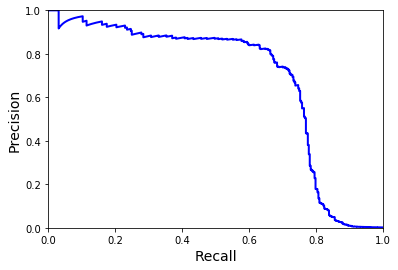

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict

for m in models:
    y_predict= cross_val_predict(m, X_cv, y_cv, method='predict_proba', cv=5)
    y_pred= y_predict[:,-1]
    
    precisions, recalls, thresholds = precision_recall_curve(y_cv, y_pred) 
    
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    
    #plot precision recall
    plot_precision_vs_recall(precisions, recalls)
    plt.show()

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    plt.xlabel("Threshold", fontsize=12)
    plt.legend(loc="down right", fontsize=10)

RandomForestClassifier


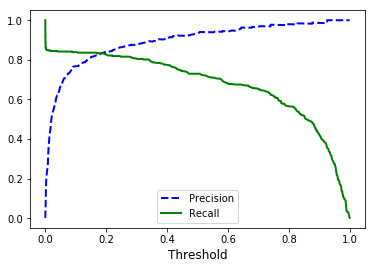

LogisticRegression


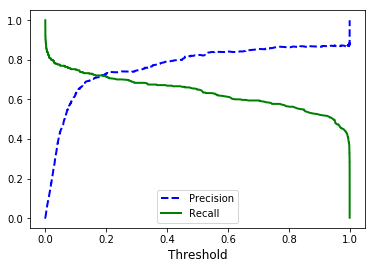

In [52]:
for m in models:
    y_predict = cross_val_predict(m, X_cv, y_cv, cv=5, method='predict_proba')
    y_pred = y_predict[:,-1]
    
    precisions, recalls, thresholds = precision_recall_curve(y_cv, y_pred)  
    
    plt.figure(figsize=(6, 4))
    print(type(m).__name__)
    
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()

## Undersampling

![title](img/u.png)

1. Ustal liczbę fraudów 
2. Podziel na fraudy i nie-fraudy
3. Wybierz tyle obserwacji "normalnych" ile mamy fraudów
4. Połącz dwa zbiory indeksów

In [33]:
und_df.head(4)

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Amount_1,Amount_100,Day,Day_time
182324,257020,157964.0,1.943661,0.070354,-0.234684,1.213840,-0.273840,-0.388226,-0.298324,-0.064429,0.484245,0.185720,-0.192326,0.973849,1.188233,-0.028922,0.947882,0.410146,-0.755566,-0.338092,-0.824688,-0.167115,-0.102525,-0.232049,0.459978,1.031220,-0.423349,-1.022945,0.055202,-0.011494,5.00,0,-0.237546,0,0,2,71564.0
68726,192273,129621.0,2.132327,0.216307,-2.624364,-0.030806,1.112103,-1.325215,1.092048,-0.668370,-0.113247,-0.036806,-0.575269,0.972700,1.308747,0.565649,-0.160625,-1.083309,-0.154262,-0.798756,0.173146,-0.103229,0.298020,1.088916,-0.209922,0.742313,0.820029,0.430669,-0.097799,-0.079296,20.12,0,-0.026270,0,0,2,43221.0
41995,101509,67857.0,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,-0.649377,0.517568,-1.356558,-0.238383,0.069579,-0.431690,-0.674724,-1.654162,-0.053961,0.520746,-1.554562,-1.463994,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,320.00,1,4.164047,0,0,1,67857.0
104970,258403,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,1.168216,-2.134732,1.128313,-4.566010,-0.126950,-2.826986,-2.865750,-0.912934,0.421144,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1,3.828687,0,0,2,72238.0


In [7]:
#Rozkład zmiennej docelowej


In [ ]:
black_list=['Class','Time','Amount']
features=[x for x in und_df.columns if x not in black_list ]
X = und_df.loc[:,features].values
y = und_df['Class'].values

models=[LogisticRegression(random_state=2019),
        RandomForestClassifier(random_state=2019)]

print('     Model      (accuracy, recall, precision, f1)  ')
for m in models:
    print(type(m).__name__,  )

![title](img/undersam.png)

![title](img/undersam2.png)

In [52]:
#Undersampling


In [53]:
def cv_undersampling (m, xc, yc):

        
    return np.mean(scores_r), np.mean(scores_p)

In [ ]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]
X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

for m in [RandomForestClassifier(max_depth=9, n_estimators=110, random_state=2019),
          LogisticRegression(C=0.1,random_state=2019)]:
    print(type(m).__name__,'(recall, precision)', )

In [ ]:
for m in [RandomForestClassifier(max_depth=7, n_estimators=110, random_state=2019),
          LogisticRegression(C=0.1, random_state=2019)]:
    print('(rec,prec,f1)', )

## Oversampling

![title](img/o.png)

###  SMOTE

In [56]:
#conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE

![title](img/s.png)

In [57]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]

Xs = train.loc[:,features].values 
ys = train['Class'].values

In [58]:
#Dogenerowanie danych


In [64]:
train_overs = pd.DataFrame(data=np.concatenate([X_resampled, y_resampled.reshape(-1,1)], axis=1), columns=features+['Class'])

print('number of fraud in oversampled dataset: {}'.format(len(X_resampled[y_resampled==1])))
print('number of non fraud in oversampled dataset: {}'.format(len(X_resampled[y_resampled==0])))

number of fraud in oversampled dataset: 199020
number of non fraud in oversampled dataset: 199020


![title](img/oversam.png)

In [13]:
def my_cv_os (m, xc, yc):

      
    return np.mean(scores_r), np.mean(scores_p)

In [16]:
models=[RandomForestClassifier(max_depth=10, n_estimators=120, random_state=2019),
        LogisticRegression(solver='lbfgs', C=0.1, random_state=2019)]

In [ ]:
black_list=['Class','Time','Amount']
features=[x for x in df.columns if x not in black_list ]

X_cv = train.loc[:,features]
y_cv = train.loc[:,'Class']

for m in models:
    print(type(m).__name__,' [recall, precision] ', np.round(my_cv_os(m, X_cv, y_cv), 3))

In [ ]:
for m in models:
    print('[rec, prec, f1]', np.round(validation(m, train_overs, test), 3),'\n')

 ### Podsumowanie 

![title](img/summary.png)

### DNN

In [20]:
black_list=['Class','Amount_1','Amount_100']
num=[x for x in df.columns if x not in black_list ]

df_nn=df.copy()
df_nn[num]=StandardScaler().fit_transform(df[num])

In [22]:
sp = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=2019)

for train_index, test_index in sp.split(df_nn, df_nn['Class']):
    train=df_nn.loc[train_index]
    test=df_nn.loc[test_index]
    
train=train.reset_index()
test=test.reset_index()
del test['index']
del test['Time']

black_list=['Class','Time','Amount']
features=[x for x in df_nn.columns if x not in black_list ]

Xs = train.loc[:,features].values 
ys = train['Class'].values

In [23]:
smote = SMOTE(random_state=2019, sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_sample(Xs, ys)

In [24]:
train_overs = pd.DataFrame(data=np.concatenate([X_resampled, y_resampled.reshape(-1,1)], axis=1), columns=features+['Class'])

print('Number of fraud in undersampled set: {}'.format(len(X_resampled[y_resampled==1])))
print('Number of non fraud in undersampled set: {}'.format(len(X_resampled[y_resampled==0])))

Number of fraud in undersampled set: 199020
Number of non fraud in undersampled set: 199020


In [25]:
X_train = train_overs.loc[:,features]
y_train = train_overs['Class']

X_valid = test.loc[:,features]
y_valid = test['Class']

### Tensorflow implementation

In [41]:
import tensorflow as tf

![title](img/nn.png)

In [42]:
tf.reset_default_graph()

In [43]:
n_inputs = X_train.shape[1]
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 2

In [44]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [45]:
with tf.name_scope("gsn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()
    hidden1 = tf.layers.dense(X, n_hidden1, name="h1",
                              activation=tf.nn.elu, kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="h2",
                              activation=tf.nn.elu, kernel_initializer=he_init)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="h3",
                              activation=tf.nn.elu, kernel_initializer=he_init)
    logits = tf.layers.dense(hidden3, n_outputs, name="out")

In [46]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [47]:
learning_rate = 0.001

with tf.name_scope("learn"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [48]:
with tf.name_scope("estimation"):
    correct = tf.nn.in_top_k(logits, y, 1)
    y_pred = tf.argmax(logits, 1)

In [49]:
def next_batch(x_= X_train.values, y_= y_train.values.ravel(), batch_size=1000):
    indices = np.random.randint(len(x_), size=batch_size) 
    np.random.shuffle(indices)
    return x_[indices], y_[indices]

In [50]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [51]:
n_epochs = 50
n_batches = 300
batch_s = X_train.shape[0]//n_batches

final_model_path = "./fraud_dnn"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 10

with tf.Session() as sess:

    start_epoch= 0
    sess.run(init)
        
    for epoch in range(start_epoch, n_epochs):
        for iteration in range(n_batches):
            X_batch, y_batch = next_batch(batch_size= batch_s)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        y_predict, loss_val = sess.run([y_pred, loss], feed_dict={X: X_valid.values, y: y_valid.values.ravel()})
        
        if epoch % 1 == 0:
            print("Epoch:", epoch+1, "\nValidation: ","\tLoss: {:.5f}".format(loss_val))
            print ("Precision: {:.2f}%".format(precision_score(y_valid.values, y_predict)*100),
                   " Recall: {:.2f}%".format(recall_score(y_valid.values, y_predict)*100))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 1
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stop")
                    break

Epoch: 1 
Validation:  	Loss: 0.01243
Precision: 34.04%  Recall: 86.49%
Epoch: 2 
Validation:  	Loss: 0.00874
Precision: 45.22%  Recall: 83.11%
Epoch: 3 
Validation:  	Loss: 0.00816
Precision: 68.11%  Recall: 85.14%
Epoch: 4 
Validation:  	Loss: 0.00655
Precision: 71.84%  Recall: 84.46%
Epoch: 5 
Validation:  	Loss: 0.00721
Precision: 74.25%  Recall: 83.78%
Epoch: 6 
Validation:  	Loss: 0.00695
Precision: 78.21%  Recall: 82.43%
Epoch: 7 
Validation:  	Loss: 0.00777
Precision: 70.95%  Recall: 85.81%
Epoch: 8 
Validation:  	Loss: 0.01048
Precision: 61.76%  Recall: 85.14%
Epoch: 9 
Validation:  	Loss: 0.00935
Precision: 77.16%  Recall: 84.46%
Epoch: 10 
Validation:  	Loss: 0.00905
Precision: 75.90%  Recall: 85.14%
Epoch: 11 
Validation:  	Loss: 0.00805
Precision: 78.26%  Recall: 85.14%
Epoch: 12 
Validation:  	Loss: 0.01043
Precision: 65.45%  Recall: 84.46%
Epoch: 13 
Validation:  	Loss: 0.00847
Precision: 86.01%  Recall: 83.11%
Epoch: 14 
Validation:  	Loss: 0.00927
Precision: 86.33%  Re

In [52]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    y_predict = y_pred.eval(feed_dict={X: X_valid.values, y: y_valid.values.ravel()})
    
print ("Precision: {:.2f}%".format(precision_score(y_valid.values, y_predict)*100),
      " Recall: {:.2f}%".format(recall_score(y_valid.values,y_predict)*100),
      " F1: {:.2f}%".format(f1_score(y_valid.values,y_predict)*100))

print(confusion_matrix(y_valid.values, y_predict))

INFO:tensorflow:Restoring parameters from ./fraud_dnn
Precision: 71.84%  Recall: 84.46%  F1: 77.64%
[[85246    49]
 [   23   125]]
